## Notebook de testes para o projeto

In [4]:
from model import modelo_unet
from utils import dice_coef, dice_coef_loss, iou
from keras.optimizers import Adam
from dataset import carregar_dataset, carregar_imagens, embaralha, tf_dataset, criar_diretorio, novas_imagens
import os
import glob
import matplotlib.pyplot as plt

In [5]:
#change current directory
os.chdir(r"C:\Users\gkhay\Workstation\mestrado\Pesquisa\macula_seg")

In [6]:
#check current directory to be the project root
os.getcwd()

'C:\\Users\\gkhay\\Workstation\\mestrado\\Pesquisa\\macula_seg'

In [7]:
#Define hiperparams
epochs = 50
batch_size = 32
lr = 1e-4
img_altura = 256
img_largura = 256

In [8]:
#pre-process dataset
path_dataset = os.path.join(r"data\new_ARIA")
(img_fnames, mask_fnames) = carregar_dataset(path_dataset)

In [9]:
# just to check image names
img_fnames[0]

'data\\new_ARIA\\all_images\\aria_c_img_001.tif'

In [10]:
#create dataset 
criar_diretorio(os.path.join(r'data\dataset_final\train\images'))
criar_diretorio(os.path.join(r'data\dataset_final\train\masks'))
criar_diretorio(os.path.join(r'data\dataset_final\test\images'))
criar_diretorio(os.path.join(r'data\dataset_final\test\masks'))

In [11]:
novas_imagens(img_fnames, mask_fnames, 'data\\dataset_final\\train\\', augmentation=True)

100%|██████████| 120/120 [00:01<00:00, 84.89it/s]


In [12]:
# img_number = random.randint(0, len(X_train))
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(blend(X_train[img_number], y_train[img_number]))
# plt.subplot(122)
# plt.imshow(X_train[img_number], cmap='gray')
# plt.show 

In [2]:
# final dataset directory resized and png
dir_dataset = r"data\dataset_final"

In [13]:
path_train = os.path.join(dir_dataset, 'train')
path_val = os.path.join(dir_dataset, 'train')

In [14]:
path_train

'data\\dataset_final\\train'

In [30]:
X_train, y_train = carregar_imagens(path_train)
X_train, y_train = embaralha(X_train, y_train)

In [35]:
X_val, y_val = carregar_imagens(path_val)

In [37]:
dataset_train = tf_dataset(X_train, y_train, batch_size=batch_size)
dataset_val = tf_dataset(X_val, y_val, batch_size=batch_size)

In [32]:
model = modelo_unet((img_altura, img_largura, 3))

In [33]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr), metrics = [dice_coef, iou, 'accuracy'])

In [34]:
model.summary()

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 256, 256, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 256, 256, 64)         0         ['batch_normalization_18[0]

In [38]:
history = model.fit(dataset_train, epochs=epochs, validation_data=dataset_val)

Epoch 1/50
4/4 [==============================] - 169s 37s/step - loss: 1.0795 - dice_coef: 0.0347 - iou: 0.0177 - accuracy: 0.1582 - val_loss: 0.6962 - val_dice_coef: 0.0345 - val_iou: 0.0175 - val_accuracy: 0.2735
Epoch 2/50
4/4 [==============================] - 127s 32s/step - loss: 0.8674 - dice_coef: 0.0350 - iou: 0.0178 - accuracy: 0.3014 - val_loss: 0.7027 - val_dice_coef: 0.0345 - val_iou: 0.0176 - val_accuracy: 0.1201
Epoch 3/50
4/4 [==============================] - 117s 30s/step - loss: 0.6934 - dice_coef: 0.0348 - iou: 0.0177 - accuracy: 0.6003 - val_loss: 0.7103 - val_dice_coef: 0.0345 - val_iou: 0.0176 - val_accuracy: 0.0602
Epoch 4/50
4/4 [==============================] - 120s 31s/step - loss: 0.5714 - dice_coef: 0.0350 - iou: 0.0178 - accuracy: 0.8004 - val_loss: 0.7169 - val_dice_coef: 0.0346 - val_iou: 0.0176 - val_accuracy: 0.0322
Epoch 5/50
4/4 [==============================] - 120s 30s/step - loss: 0.4852 - dice_coef: 0.0352 - iou: 0.0179 - accuracy: 0.9058 - va

In [39]:
model.save(r"models\unet_bincross_adam_10-08.keras")

In [40]:
def segmenta_img(img, modelo_teste):
  predicao = modelo_teste.predict(np.expand_dims(img, axis=0))[0]
  predicao = predicao > 0.5 #estudo do limiar between 
  predicao = predicao.astype(np.int32)
  predicao = np.squeeze(predicao, axis=-1)
  return predicao

In [41]:
X_val

['data\\dataset_final\\train\\images\\aria_c_img_001.png',
 'data\\dataset_final\\train\\images\\aria_c_img_002.png',
 'data\\dataset_final\\train\\images\\aria_c_img_003.png',
 'data\\dataset_final\\train\\images\\aria_c_img_004.png',
 'data\\dataset_final\\train\\images\\aria_c_img_005.png',
 'data\\dataset_final\\train\\images\\aria_c_img_006.png',
 'data\\dataset_final\\train\\images\\aria_c_img_007.png',
 'data\\dataset_final\\train\\images\\aria_c_img_008.png',
 'data\\dataset_final\\train\\images\\aria_c_img_009.png',
 'data\\dataset_final\\train\\images\\aria_c_img_010.png',
 'data\\dataset_final\\train\\images\\aria_c_img_011.png',
 'data\\dataset_final\\train\\images\\aria_c_img_012.png',
 'data\\dataset_final\\train\\images\\aria_c_img_013.png',
 'data\\dataset_final\\train\\images\\aria_c_img_014.png',
 'data\\dataset_final\\train\\images\\aria_c_img_015.png',
 'data\\dataset_final\\train\\images\\aria_c_img_016.png',
 'data\\dataset_final\\train\\images\\aria_c_img_017.png

1/1 [==============================] - 0s 237ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

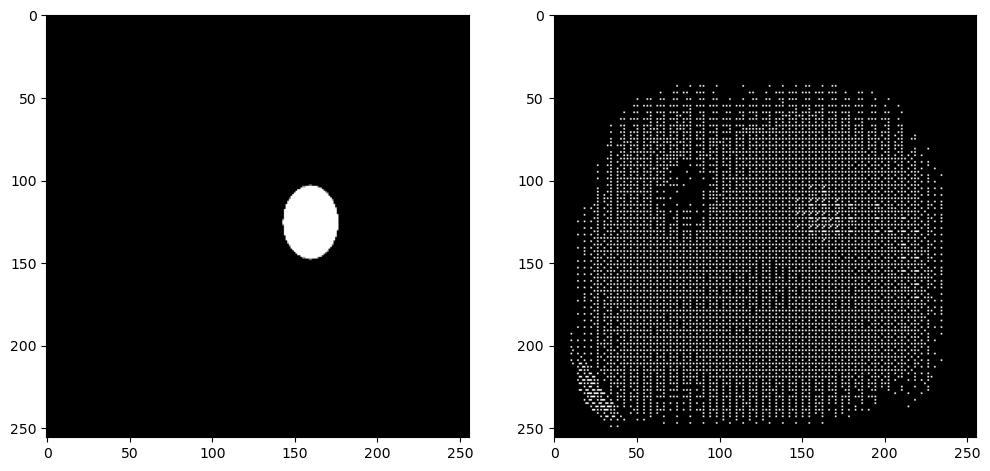

In [95]:
import random
import cv2
import numpy as np
img_number = random.randint(0, len(X_train))
img_teste = cv2.imread(X_val[img_number])
img_rgb = cv2.cvtColor(img_teste, cv2.COLOR_BGR2RGB)
mask_teste = cv2.imread(y_val[img_number])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(mask_teste)
plt.subplot(122)
plt.imshow(segmenta_img(img_rgb,model),cmap='gray')
plt.show